## **Assignment 2 : Sentiment Analysis using RNNs**
### Bhavesh Garg (17D070031), Jayesh Choudhary (170070038)

In [1]:
#Code for part (1)
#Read about the implementation details from https://pytorchnlp.readthedocs.io/en/latest/source/torchnlp.word_to_vector.html

In [2]:
import torch
from torchtext import data
from torchtext import datasets
import matplotlib.pyplot as plt
import gensim.downloader
import random
import torch.optim as optim
import time
import numpy as np
from torch.nn.utils.rnn import pack_padded_sequence, PackedSequence
import torch.nn as nn

In [3]:
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [4]:
list_model = np.array(['glove-twitter-50','glove-twitter-200','glove-wiki-gigaword-50','glove-wiki-gigaword-300','word2vec-google-news-300'])

In [5]:
glove_vectors = gensim.downloader.load(list_model[0])

In [6]:
a = glove_vectors.get_vector('prince')
b = glove_vectors.get_vector('boy')
c = glove_vectors.get_vector('girl')
d = glove_vectors.get_vector('princess')
print(glove_vectors.similar_by_vector(a-b+c,5))

print("\n Word embedding : ", list_model[0])
print("L2 norm of princess is :",np.linalg.norm(d))
print("L2 norm of prince - boy + girl is :",np.linalg.norm(a-b+c))
print("L2 norm distance between 2 vectors is:",np.linalg.norm(a-b+c-d))
print('\n')


[('prince', 0.9130672812461853), ('queen', 0.8670823574066162), ('princess', 0.8478097319602966), ('beautiful', 0.8258615732192993), ('girl', 0.8215882182121277)]

 Word embedding :  glove-twitter-50
L2 norm of princess is : 5.012761
L2 norm of prince - boy + girl is : 5.573292
L2 norm distance between 2 vectors is: 2.9694865




/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


# Observations - Part (1) : 


---


***Word embedding :  glove-twitter-50***
*   L2 norm of princess is : 5.012761
*   L2 norm of prince - boy + girl is : 5.573292
*   L2 norm distance between 2 vectors is: 2.9694865
*   5 closest vectors to 'prince'-'boy'-'girl': are prince, queen, princess,beautiful and girl


---



***Word embedding :  glove-twitter-200***
*   L2 norm of princess is : 6.5795627
*   L2 norm of prince - boy + girl is : 7.1876793
*   L2 norm distance between 2 vectors is: 5.001938
*   5 closest vectors to 'prince'-'boy'-'girl': are prince, princess, queen, girl and beautiful


---


***Word embedding :  glove-wiki-gigaword-50***
*   L2 norm of princess is : 5.7119613
*   L2 norm of prince - boy + girl is : 5.589257
*   L2 norm distance between 2 vectors is: 3.2500508
*   5 closest vectors to 'prince'-'boy'-'girl': are prince, princess, queen, duchess and eldest


---


***Word embedding :  glove-wiki-gigaword-300***
*   L2 norm of princess is : 7.2799983
*   L2 norm of prince - boy + girl is : 7.830418
*   L2 norm distance between 2 vectors is: 5.800549
*   5 closest vectors to 'prince'-'boy'-'girl': are prince, princess, queen, duchess and crown


---


***Word embedding :  word2vec-google-news-300***
*   L2 norm of princess is : 3.2880943
*   L2 norm of prince - boy + girl is : 3.4940193
*   L2 norm distance between 2 vectors is: 2.3989635
*   5 closest vectors to 'prince'-'boy'-'girl': are prince, princess, duchess, princes and monarch


---

1. As the vector dimension increases, L2 norm is greater but since the number of dimension increases, the average effective vector value for one dimension is still smaller for case when we use larger dimension. Thus using larger dimensions is better for analogy tasks.

2. Closest words are more or less same for one particular corpora with different dimensions.

3. For different corpora, words are different as the distance from the vector increases.


## **Part(2) : Observations and inference** (Sentiment Analysis)

**Baseline model setting**: dropout = 0, bidirectional = False, pre-trained-embedding = false, n_layers = 1, hidden_dim = 256

As evident from the below loss and accuracy curves, no dropout leads to heavy overfitting in the model, test accuracy = 85.98%.


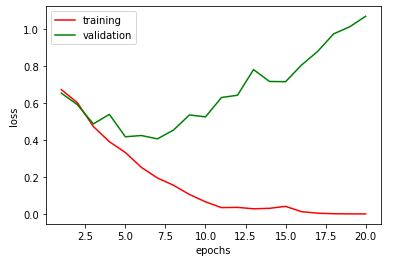
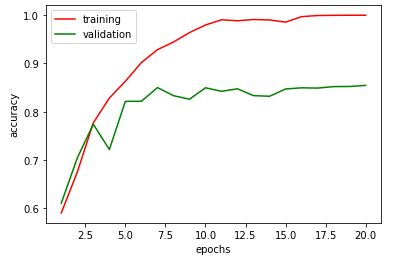

**Adding dropout(p=0.5) and using pre-trained embedding:** the model stops overfitting and the test accuracy increases as expected from dropout regularization, test accuracy = 87.31%. The loss and accuracy curves are shown below:

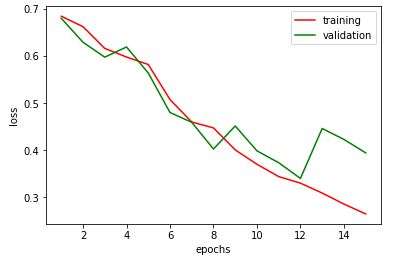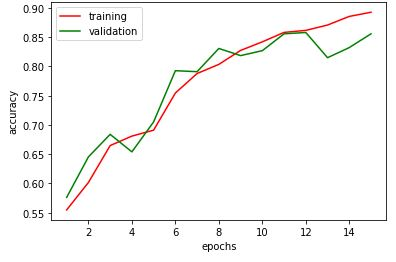

# **Part(3) : Hyperparameter tuning:**
*Baseline model :* dropout = 0, n_layers = 2, bidirectional = False, hidden_dim = 256, pre-trained-embedding = true, num_weights = 3.39M, test_acc = 84.52%. All models have been trained for 15 epochs


1.   Effect of dropout:
*   dropout (p=0.3) applied to baseline: test accuracy = 85.40%
*   dropout (p=0.5) applied to baseline: test accuracy = 87.71%
*   dropout (p=0.8) applied to baseline: test accuracy = 87.82%
*   **Inference** Adding dropout to our model helps control overfitting in the model and this helps performing better on the test set with both loss and accuracy. This is better evident from the previous loss and accuracy curves.

2.   Effect of weight decay (L2 regularization, dropout=0.5):
*   weight decay = 10^-3 applied to baseline: test accuracy = 54.57%
*   weight decay = 10^-4 applied to baseline: test accuracy = 87.03%
*   weight decay = 10^-5 applied to baseline: test accuracy = 86.03%
*   **Inference** Applying regularization by weight decay after dropout does not improve the test accuracy as compared to with only dropout. Applying very high (10^-3) weight decay has a very adverse effect and causes underfitting.
*   weight decay = 10^-5 applied to baseline without dropout: test accuracy = 86.96%
*   weight decay = 5*10^-4 applied to baseline without dropout: test accuracy = 86.41%
*   **Inference** Applying weight decay alone increases the test accuracy but does not prevent overfitting. The effect of weight decay and dropout independently on test accuracy is similar but dropout prevents overfitting and thus it should be chosen for regularization.


3. Effect of hidden dimensions (dropout=0.5):
*   hidden dim = 128: no. of weights = 2.75 M, test accuracy = 88.02%
*   hidden dim = 512: no. of weights = 5.86 M, test accuracy = 87.58%
*   **Inference** Decreasing number of hidden dims slightly increases the test accuracy here (87.71 to 88.02) whereas increasing hidden dims slightly reduces it (87.71 to 87.58). This can mean that the model does not require a lot of parameters to fit on the trainig dataset and access parameters can start overfitting.

4. Effect of number of LSTM layers (dropout=0.5):
*   num_layers = 3: no. of weights = 3.92 M, test accuracy = 87.14%
*   num_layers = 4: no. of weights = 4.44 M, test accuracy = 88.00%
*   **Inference** Increasing the number of LSTM layers does not affect the test accuracy by a significant margin and it also increases the training time per epoch. Therefore, number of LSTM layers = 2 in the model is sufficient for the dataset at hand and increasing the layers can also start overfitting.


# **Part(4) : Testing on custom input**:
Model setting : dropout = 0.5, bidirectional = False, pre-trained-embedding = false, n_layers = 2, hidden_dim = 256

* "it is a disgusting and stupid film" 			- 0.075 - negative sentiment
* "That was a very good film"			 	- 0.933 - positive sentiment
* "This is a very good film" 				- 0.998 - positive sentiment
* "Star wars is a very good film" 			- 0.998 - positive sentiment
* "Tees Maar Khan was a stupid film" 			- 0.013 - negative sentiment
* "I liked the movie very much" 			- 0.991 - positive sentiment
* "I would recommend everyone to watch this movie" - 0.997 - positive sentiment
* "Good movie" 						- 0.996 - positive sentiment
* "I will watch it again" 					- 0.994 - positive sentiment
* "Waste of money" 					- 0.006 - negative sentiment

**Inference** : The model performs fairly well on our custom inputs. All the inputs were classified correctly. Even when particular movie names like "Star Wars" are included, the results are good.

# **Part(5) : Bonus part**
Using bidirectional LSTM: the number of weights and the training time per epoch of the model increases considerably, however the test accuracy does not show much improvement, test accuracy for baseline model = 87.84% (with dropout enabled).

**Inference** : Using bidirectional LSTMs can help model apply context from the end of a sentence or review. On retraining many of the above models using bidirectional LSTMs, we find that the performance gains are not significant, however, the no. of weights, the training time per epoch and the GPU usage increases significantly.

In [7]:
# code used for part (2), (3), (4), (5):
# "Inspiration" for Code for Sentiment analysis is from the reference given in the assignment. https://github.com/bentrevett/pytorch-sentiment-analysis.
# We modified the architecture of the RNN to include both unidirectional and bidirectional LSTMs in the model.
# We also introduced testing for custom movie reviews


In [8]:
#even and odd seed reverse the meaning of 1 and 0 for output label.
SEED = 1
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
TEXT = data.Field(tokenize = 'spacy', include_lengths = True)
LABEL = data.LabelField(dtype = torch.float)

In [9]:
train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)

In [10]:
train_data, valid_data = train_data.split(random_state = random.seed(SEED))

In [11]:
MAX_VOCAB_SIZE = 25_000

TEXT.build_vocab(train_data, 
                 max_size = MAX_VOCAB_SIZE)
                 #vectors = "glove.6B.100d", 
                 #unk_init = torch.Tensor.normal_)

LABEL.build_vocab(train_data)

In [12]:
BATCH_SIZE = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE,
    sort_within_batch = True,
    device = device)

In [13]:
# The following function has been used from https://discuss.pytorch.org/t/error-with-lengths-in-pack-padded-sequence/35517/1
# This is a small fix for a pytorch cuda error in pack_padded_sequence function

torch.set_default_tensor_type(torch.cuda.FloatTensor)
from torch.nn.utils.rnn import pack_padded_sequence, PackedSequence

#if using bidirectional LSTMs, run this cell, otherwise run the next cell

def hotfix_pack_padded_sequence(input, lengths, batch_first=False, enforce_sorted=True):
    lengths = torch.as_tensor(lengths, dtype=torch.int64)
    lengths = lengths.cpu()
    if enforce_sorted:
        sorted_indices = None
    else:
        lengths, sorted_indices = torch.sort(lengths, descending=True)
        sorted_indices = sorted_indices.to(input.device)
        batch_dim = 0 if batch_first else 1
        input = input.index_select(batch_dim, sorted_indices)

    data, batch_sizes = \
        torch._C._VariableFunctions._pack_padded_sequence(input, lengths, batch_first)
    return PackedSequence(data, batch_sizes, sorted_indices)

class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, 
                 bidirectional, dropout, pad_idx):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)
        
        self.rnn = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers, 
                           bidirectional=bidirectional, 
                           dropout=dropout)
        
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text, text_lengths):
        
        #text = [sent len, batch size]
        
        embedded = self.dropout(self.embedding(text))
        
        #embedded = [sent len, batch size, emb dim]
        
        #pack sequence
        #packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths)
        packed_embedded = hotfix_pack_padded_sequence(embedded, text_lengths)

        packed_output, (hidden, cell) = self.rnn(packed_embedded)
        
        #unpack sequence
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)

        #output = [sent len, batch size, hid dim * num directions]
        #output over padding tokens are zero tensors
        
        #hidden = [num layers * num directions, batch size, hid dim]
        #cell = [num layers * num directions, batch size, hid dim]
        
        #concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers
        #and apply dropout
        #print(hidden.size())

        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
                
        #hidden = [batch size, hid dim * num directions]
            
        return self.fc(hidden)

In [14]:
import torch.nn as nn
torch.set_default_tensor_type(torch.cuda.FloatTensor)
from torch.nn.utils.rnn import pack_padded_sequence, PackedSequence

def hotfix_pack_padded_sequence(input, lengths, batch_first=False, enforce_sorted=True):
    lengths = torch.as_tensor(lengths, dtype=torch.int64)
    lengths = lengths.cpu()
    if enforce_sorted:
        sorted_indices = None
    else:
        lengths, sorted_indices = torch.sort(lengths, descending=True)
        sorted_indices = sorted_indices.to(input.device)
        batch_dim = 0 if batch_first else 1
        input = input.index_select(batch_dim, sorted_indices)

    data, batch_sizes = \
        torch._C._VariableFunctions._pack_padded_sequence(input, lengths, batch_first)
    return PackedSequence(data, batch_sizes, sorted_indices)

class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, 
                 bidirectional, dropout, pad_idx):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)
        
        self.rnn = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers, 
                           bidirectional=bidirectional, 
                           dropout=dropout)
        
        self.fc = nn.Linear(hidden_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text, text_lengths):
        
        #text = [sent len, batch size]
        
        embedded = self.dropout(self.embedding(text))
        
        #embedded = [sent len, batch size, emb dim]
        
        #pack sequence
        #packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths)
        packed_embedded = hotfix_pack_padded_sequence(embedded, text_lengths)

        packed_output, (hidden, cell) = self.rnn(packed_embedded)
        
        #unpack sequence
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)

        #output = [sent len, batch size, hid dim * num directions]
        #output over padding tokens are zero tensors
        
        #hidden = [num layers * num directions, batch size, hid dim]
        #cell = [num layers * num directions, batch size, hid dim]
        
        #concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers
        #and apply dropout
        
        #hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
        hidden = self.dropout(hidden[-1,:,:])
                
        #hidden = [batch size, hid dim * num directions]
            
        return self.fc(hidden)

In [15]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 1
N_LAYERS = 2
BIDIRECTIONAL = False
DROPOUT = 0.5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = RNN(INPUT_DIM, 
            EMBEDDING_DIM, 
            HIDDEN_DIM, 
            OUTPUT_DIM, 
            N_LAYERS, 
            BIDIRECTIONAL, 
            DROPOUT, 
            PAD_IDX)

In [16]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 3,393,385 trainable parameters


In [17]:
#pretrained_embeddings = TEXT.vocab.vectors
#print(pretrained_embeddings.shape)

In [18]:
#model.embedding.weight.data.copy_(pretrained_embeddings)

In [19]:
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

print(model.embedding.weight.data)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 1.5133, -0.1742, -0.2860,  ..., -0.5815, -0.4711,  0.0896],
        ...,
        [ 0.7025, -1.2864, -1.3334,  ..., -1.0132,  0.9381, -1.0957],
        [-1.4224, -0.8277,  0.1380,  ...,  0.1417, -0.6506,  1.2588],
        [ 0.0205, -1.1911,  1.7161,  ..., -0.1134, -1.3168,  0.1093]])


In [20]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

In [21]:
criterion = nn.BCEWithLogitsLoss()

model = model.to(device)
criterion = criterion.to(device)

In [22]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

In [23]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        text, text_lengths = batch.text
        
        predictions = model(text, text_lengths).squeeze(1)
        #print(predictions.size(), batch.label.size())
        #batch.label = torch.unsqueeze(torch.unsqueeze(batch.label, 0), 2)
        
        loss = criterion(predictions, batch.label)
        
        acc = binary_accuracy(predictions, batch.label)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [24]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            text, text_lengths = batch.text
            
            predictions = model(text, text_lengths).squeeze(1)
            #batch.label = torch.unsqueeze(torch.unsqueeze(batch.label, 0), 2)
            
            loss = criterion(predictions, batch.label)
            
            acc = binary_accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [25]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [26]:
N_EPOCHS = 15

train_losses, valid_losses = [], []
train_acces, valid_acces = [], []

#best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    train_acces.append(train_acc)
    valid_acces.append(valid_acc)
    
    #if valid_loss < best_valid_loss:
    #    best_valid_loss = valid_loss
    #    torch.save(model.state_dict(), 'tut2-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 17s
	Train Loss: 0.682 | Train Acc: 55.90%
	 Val. Loss: 0.671 |  Val. Acc: 60.24%
Epoch: 02 | Epoch Time: 0m 17s
	Train Loss: 0.677 | Train Acc: 56.85%
	 Val. Loss: 0.686 |  Val. Acc: 60.26%
Epoch: 03 | Epoch Time: 0m 18s
	Train Loss: 0.627 | Train Acc: 65.65%
	 Val. Loss: 0.552 |  Val. Acc: 73.97%
Epoch: 04 | Epoch Time: 0m 18s
	Train Loss: 0.543 | Train Acc: 73.53%
	 Val. Loss: 0.474 |  Val. Acc: 78.19%
Epoch: 05 | Epoch Time: 0m 18s
	Train Loss: 0.468 | Train Acc: 78.73%
	 Val. Loss: 0.472 |  Val. Acc: 79.23%
Epoch: 06 | Epoch Time: 0m 18s
	Train Loss: 0.403 | Train Acc: 82.32%
	 Val. Loss: 0.416 |  Val. Acc: 81.91%
Epoch: 07 | Epoch Time: 0m 18s
	Train Loss: 0.354 | Train Acc: 84.84%
	 Val. Loss: 0.402 |  Val. Acc: 83.74%
Epoch: 08 | Epoch Time: 0m 18s
	Train Loss: 0.315 | Train Acc: 87.08%
	 Val. Loss: 0.322 |  Val. Acc: 86.66%
Epoch: 09 | Epoch Time: 0m 18s
	Train Loss: 0.294 | Train Acc: 87.71%
	 Val. Loss: 0.312 |  Val. Acc: 87.62%
Epoch: 10 | Epoch T

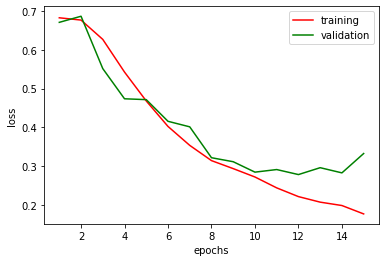

In [27]:
x = list(range(1, N_EPOCHS+1))
plt.plot(x, train_losses, color='red', label='training')
plt.plot(x, valid_losses, color='green', label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

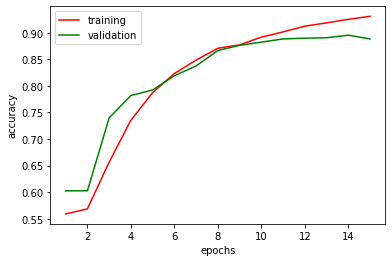

In [28]:
x = list(range(1, N_EPOCHS+1))
plt.plot(x, train_acces, color='red', label='training')
plt.plot(x, valid_acces, color='green', label='validation')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [29]:
test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.350 | Test Acc: 87.84%


In [30]:
import spacy
nlp = spacy.load('en')

def predict_sentiment(model, sentence):
    model.eval()
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)]
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    length = [len(indexed)]
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(1)
    length_tensor = torch.LongTensor(length)
    prediction = torch.sigmoid(model(tensor, length_tensor))
    print(prediction.item())

In [31]:
predict_sentiment(model, "it is a disgusting and stupid film")
predict_sentiment(model, "That was a very good film")
predict_sentiment(model, "This is a very good film")
predict_sentiment(model, "Star wars is a very good film")
predict_sentiment(model, "Tees Maar Khan was a stupid film")
predict_sentiment(model, "I liked the movie very much")
predict_sentiment(model, "I would recommend everyone to watch this movie")
predict_sentiment(model, "Good movie")
predict_sentiment(model, "I will watch it again")
predict_sentiment(model, "Waste of money")

0.07549282163381577
0.9332518577575684
0.9979599714279175
0.9979877471923828
0.013087828643620014
0.9915587902069092
0.9972871541976929
0.9964292645454407
0.9947261214256287
0.0064240870997309685
